In [1]:
# nex up.
# volatility should also be mean revertin.

# rolling mean should be "mean reverting" ???
# lets plot rolling mean over time.

# compute volatilit nad plot versus 
# compute volatilit nad plot versus 

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# get historical daily price for SPY
symbol = 'SPY'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

In [4]:
# log return computation
changes = history.Close.pct_change(30).dropna().values
df=pd.DataFrame()
df['price'] = history.Close
df['pct_chg'] = df.price.pct_change()
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
df['ret_mean'] = df.log_ret.rolling(30).mean()
df['hist_volatility'] = df.log_ret.rolling(30).std()*252
df = df.dropna()

In [11]:
the_vol_mean = df.hist_volatility.mean()
print('mean of hist_volatility',the_vol_mean)
the_ret_mean = df.ret_mean.mean()
print('mean of rolling mean',the_ret_mean)

mean of hist_volatility 2.5592520443143885
mean of rolling mean 0.0003664032744650673


Text(0, 0.5, 'rolling daily price return (n=30)')

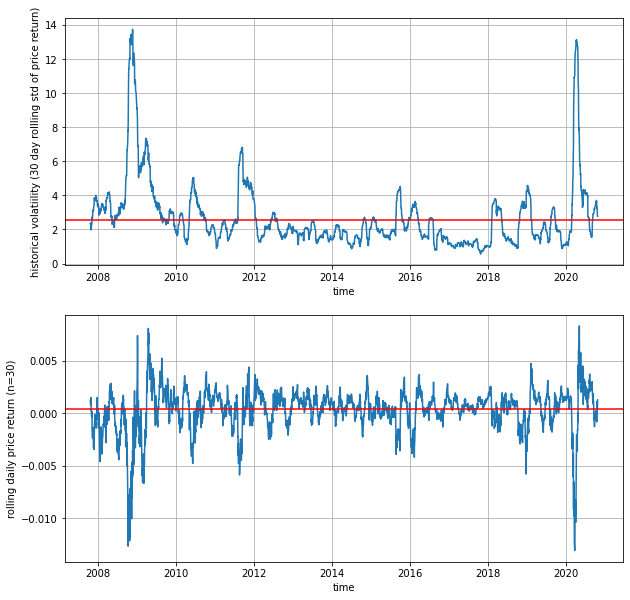

In [12]:
plt.figure(0,figsize=(10,10))
plt.subplot(211)
plt.plot(df.iloc[-252*13:].hist_volatility)
plt.axhline(the_vol_mean,color='red')
plt.xlabel('time')
plt.ylabel('historical volatiility (30 day rollling std of price return)')
plt.grid(True)

plt.subplot(212)
plt.plot(df.iloc[-252*13:].ret_mean)
plt.axhline(the_ret_mean,color='red')
#plt.xticks(rotation=30)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('rolling daily price return (n=30)')

Text(0, 0.5, 'rolling daily price return (n=30)')

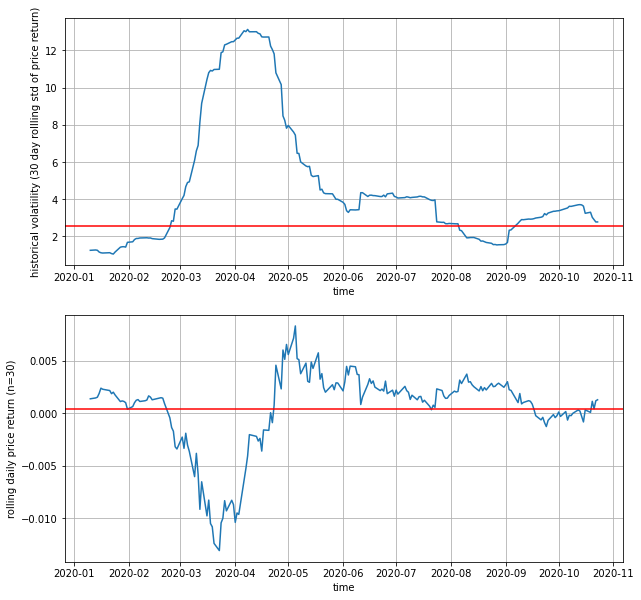

In [13]:
plt.figure(0,figsize=(10,10))
plt.subplot(211)
plt.plot(df.iloc[-200:].hist_volatility)
plt.axhline(the_vol_mean,color='red')
plt.xlabel('time')
plt.ylabel('historical volatiility (30 day rollling std of price return)')
plt.grid(True)

plt.subplot(212)
plt.plot(df.iloc[-200:].ret_mean)
plt.axhline(the_ret_mean,color='red')
#plt.xticks(rotation=30)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('rolling daily price return (n=30)')

Text(0, 0.5, 'historical volatility')

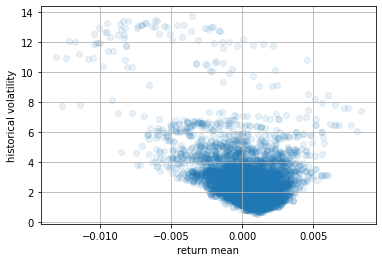

In [14]:
plt.scatter(df.ret_mean,df.hist_volatility,alpha=.1)
plt.grid(True)
plt.xlabel('return mean')
plt.ylabel('historical volatility')